
## Load Data from CSVs
Here is an example you might be familiar with for loading a csv
After the example you will see a new and shorter version.
It is recommended you open the csv manually and get familiar with the data before running the code below. 

### Longer version
Loading enrollments.csv

rb: for reading and b is for reading in binary mode)

DictReader: It works by reading in the first line of the CSV and using each comma separated value in this line as a dictionary key

In [1]:
import unicodecsv

enrollments = []

f = open('enrollments.csv', 'rb')
reader = unicodecsv.DictReader(f)

for row in reader:
    enrollments.append(row)
f.close()

enrollments[0]


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

### Shorter version
with: will open and close file when it is done. 

In [2]:
enrollments_filename = 'enrollments.csv'

with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

### What is looks like to load all files with shorter version

In [3]:
## Read in data from files. 
## store results in variables for each file.
## print first row of each table.

import unicodecsv

enrollments_filename = 'enrollments.csv'
engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

In [4]:
with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [5]:
with open('daily_engagement.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
daily_engagement[0] 

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [6]:
with open('project_submissions.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

### Observe the data
Once you have brought in a record from any file you will want to do a few things
to get familiar with the data.
1 is look at the data types. The reason is you will need to maybe do math 
or filters and will have to decide how you will handle the data types. 
What do you notice about the above data types?



# Cleaning data
* Fixing Data Types 
* Changing column Headers
* Counts, comparisions and Unique

After reviewing the code above you may have noticed a trend
they are all strings!
For our purposes we will want to change some of these:

### Enrollment file
We will start by reviewing what the enrollent file has and what we want
* cancel_date    to date
* days_to_cancel to integer
* is_canceled    to Boolean
* is_udacity     to Boolean
* join_date      to Date

First we will need to create some functions that will loop through and do our conversions for us

#### date to python data format 
we will call this later when we are ready to clean our dates

In [7]:
from datetime import datetime as dt
 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    


#### string to integer

In [8]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [9]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

### Engagement file
These are a lot of decimal places stored as strings. They will need to be converted to float before being converted into int.
* lessons_completed      to int int(float(0.0) 
* nums_courses_visited   to int int(float())
* projects_completed     to 
* total_minutes_visited  to 
* utc_date               to 

In [10]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [11]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [12]:
## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key']= engagement_record['acct'] 
    del[engagement_record['acct']]

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [13]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = 1640            # Replace this with your code
enrollment_num_unique_students = 1302  # Replace this with your code

engagement_num_rows = 0             # Replace this with your code
engagement_num_unique_students = 0  # Replace this with your code

submission_num_rows = 0             # Replace this with your code
submission_num_unique_students = 0  # Replace this with your code

In [14]:
len(enrollments)

1640

In [15]:
len(daily_engagement)

136240

In [16]:
len(project_submissions)

3642

We will build a function so that we wont have to build code over and over for each
sheet. Notice account_key. its a good thing that header was changed or this 
would be more complex. 

In [17]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [18]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [19]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [20]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [21]:
daily_engagement[0]['account_key']

'0'

### Check the dates

In [22]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print(enrollment)
        num_problem_students += 1

num_problem_students



OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

## Missing Engagement Records

### Remove test data

In [23]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [24]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [25]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [26]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or \
               enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [27]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [28]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [29]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print('Paid engagements in first week:')
print(len(paid_engagement_in_first_week))

1293
134549
3618
Paid engagements in first week:
6919


In [30]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Exploring Student Engagement

In [31]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [32]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [33]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = np.array(list(total_minutes_by_account.values()))
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))


Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [34]:
#####################################
#                 8                 #
#####################################

# this is taking the max minutes and looking for any students that meet that max minute
# first there is a loop that reviews the file 

student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes

3564.7332644989997

### Find the Max student 
We should be expecting the records returned to be only 7 days worth of data. 


In [35]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

Review the first week code and head back up to fix it
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7
    What about students who signed up canceled and then signe up again?
    So we want to see people who signed up and engaged within 7 days. 
    Scenario would be A students signed up, cancled and then 8 days later signed up again and
    engaged.  to check this we can add that 0 days passed from sign up to engagement. This   makes an assumption though..
    Go the top and you can change the code to
    return time_delta.days < 7 and time_delta.days >= 0
    

## Lessons Completed in First Week

In [36]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
'''from collections import defaultdict
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
'''
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [37]:
'''
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
'''
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0 
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [38]:
import numpy as np
def describe_data(data):
    print('Mean', np.mean(data))
    print('Standard deviation:',np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    
total_minutes = np.array(list(total_minutes_by_account.values()))
describe_data(total_minutes)

Mean 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [49]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
lessons_completed_by_account = np.array(list(lessons_completed_by_account.values()))
describe_data(lessons_completed_by_account)


Mean 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [51]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for engagement_record in paid_engagement:
    if  engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [55]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
days_visited_by_account = np.array(list(days_visited_by_account.values()))
describe_data(days_visited_by_account)

Mean 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [59]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if ((project in subway_project_lesson_keys) and
            (rating == "PASSED" or rating == "DISTINCTION")):
        pass_subway_project.add(submission['account_key'])
len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key']in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [70]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

# Total Minutes Visited
print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')

describe_data_npm = np.array(list((non_passing_minutes.values())))
print(describe_data_npm)


print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')

describe_data_pm = np.array(list((passing_minutes.values())))
print(describe_data_pm)


# Lessons Completed
print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')

describe_data_npl = np.array(list((non_passing_lessons.values())))
print(describe_data_npl)


print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')

describe_data_pl = np.array(list((passing_lessons.values())))
print(describe_data_pl)



# Visits
print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')

describe_data_npv = np.array(list((non_passing_visits.values())))
print(describe_data_npv)


print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')

describe_data_pv = np.array(list((passing_visits.values())))
print(describe_data_pv)

non-passing students:
[ 736.43716483  177.83674867    0.            0.          193.848226
   92.55472317    0.          138.052647    144.12431733    0.
  454.2731635   115.155591     32.816891    348.39415717  171.59336683
   16.57458467  100.0702155    25.24354       9.61211033   18.8897565
    0.            0.           16.604203      0.          198.69626317
  666.329091     88.1119545    56.45108967    0.            0.
    0.         1329.9598305    88.0103965     3.56199133  253.2367575
  139.060529    307.300651      0.            9.4907925   401.8189395
   29.9067615    21.12844967    0.           41.7199715   219.92606667
    0.          313.50181033  489.7736965     0.          374.57610383
  706.5435295     0.          324.63023783   52.12896733   30.59517617
  116.62887683  413.3262125    34.03308733    0.          354.62234967
    0.          100.06368333   85.29257      59.34078367  135.6825435
  275.166407      0.            0.          199.31994917   48.19741517
    4.

## Making Histograms

In [75]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)

## Improving Plots and Sharing Findings

Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who pass the subway project')

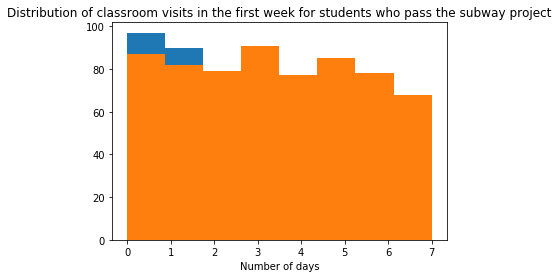

In [76]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')